# Set up

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import requests

# Getting data

In [4]:
with open('../csvs/top_50_weekly_data.json') as f:
    top_data = json.load(f)

In [5]:
top_df = pd.DataFrame([i['entry_history'] for i in top_data])
top_df['round_points'] = top_df['points'] - top_df['event_transfers_cost']
top_df.head()

,bank,entry,event,event_transfers,event_transfers_cost,id,movement,overall_rank,points,points_on_bench,rank,rank_sort,targets,total_points,value,round_points
0,0,107827,1,0,0,107827,new,405969,75,14,405969,407825,None,75,1000,75
1,0,107827,2,1,0,4664139,new,80980,99,1,66206,66330,None,174,1004,99
2,5,107827,3,1,0,9773353,new,116116,46,5,3347696,3348830,None,220,1011,46
3,18,107827,4,2,4,15147223,new,55041,65,17,220533,220740,None,281,1017,61
4,18,107827,5,0,0,20652163,new,2687,98,11,11172,11215,None,379,1023,98


In [6]:
top_entry = top_df[(top_df['event'] == 38)
                   & (top_df['overall_rank'] == 1)]['entry'].iloc[0]

In [7]:
top_df_test = top_df.copy()
top_df_test = top_df_test[top_df_test['event'] > 20]

In [8]:
top_df_overall = top_df.groupby('entry')['round_points'].sum()
top_df_test_overall = top_df_test.groupby('entry')['round_points'].sum()

In [9]:
entry_df = pd.DataFrame([i['event'] for i in top_data[20:38]])

In [10]:
top_df['entry'].describe().round()

count       1900.0
mean      631636.0
std       755701.0
min         5480.0
25%       164452.0
50%       305962.0
75%       805003.0
max      3111205.0
Name: entry, dtype: float64

In [11]:
top_df.groupby('entry')['round_points'].sum().max()

2659

In [23]:
standings_arr = []

for i in np.random.choice(range(1, 3000000), 100000, replace=False):
    try:
        entry_history_request = requests.get(f'https://fantasy.premierleague.com/api/entry/{i}/history/')
        entry_history_data = entry_history_request.json()
        standings_arr.append([i for i in entry_history_data['past'] if i['season_name'] == '2018/19'][0])
    except Exception as e:
#         print(e)
        continue

print(len(standings_arr))

73884


In [25]:
standings_df = pd.DataFrame(standings_arr)
standings_df.sort_values('rank', inplace=True)
standings_df.head(10)

,rank,season_name,total_points
5750,4,2018/19,2589
8261,13,2018/19,2568
30182,71,2018/19,2529
44541,81,2018/19,2528
59874,141,2018/19,2516
14640,161,2018/19,2513
69779,173,2018/19,2511
84,228,2018/19,2504
6902,234,2018/19,2503
10288,244,2018/19,2502


In [26]:
standings_df.tail(10)

,rank,season_name,total_points
47054,6296350,2018/19,-1426
21289,6296433,2018/19,-1740
68445,6296489,2018/19,-2072
45748,6296518,2018/19,-2233
43438,6296553,2018/19,-2506
58407,6296557,2018/19,-2586
58902,6296568,2018/19,-2662
67071,6296627,2018/19,-3611
58398,6296636,2018/19,-3829
6930,6296648,2018/19,-4167


In [27]:
standings_df['total_points'].median()

2001.0

In [50]:
standings_df['total_points'].mean()

1946.1407341237616

In [28]:
top_df.groupby('entry')['round_points'].sum().sort_values(ascending=False)

entry
107827     2659
616809     2602
176339     2589
609081     2589
328368     2587
2480512    2580
264674     2580
99890      2572
2101091    2572
246972     2572
309108     2572
138561     2570
2477540    2568
1231822    2568
8242       2564
20727      2563
304393     2562
204095     2560
226251     2560
100121     2558
582794     2557
307531     2556
102725     2554
67718      2552
316334     2552
250725     2552
1721966    2552
1481682    2548
212119     2548
236918     2547
217612     2546
686015     2545
164452     2545
909908     2544
1386175    2544
3111205    2543
271163     2543
390901     2543
805003     2543
5480       2543
56648      2542
22535      2542
816383     2542
25055      2541
196386     2540
2557010    2539
1053812    2539
525414     2538
573693     2538
473996     2537
Name: round_points, dtype: int64

In [29]:
(top_df_test_overall/top_df_overall).describe()

count    50.000000
mean      0.479935
std       0.014633
min       0.447348
25%       0.472576
50%       0.480535
75%       0.489179
max       0.514341
Name: round_points, dtype: float64

# Benchmarking

In [30]:
# mean points of top 50 managers

top_df_test_overall.mean()

1227.74

In [31]:
# best points of top 50 managers

top_df_test_overall.max()

1327

In [32]:
# worst points of top 50 managers

top_df_test_overall.min()

1147

In [33]:
# my estimated return

round(2144*0.479935)

1029

In [34]:
# average points of all managers

entry_df['average_entry_score'].sum()

920

In [77]:
top_test_ranking = \
top_df_test_overall.sort_values(ascending=False).reset_index()

top_test_ranking['rank'] = top_test_ranking.index + 1
top_test_ranking[['rank', 'round_points']].head()

,rank,round_points
0,1,1327
1,2,1321
2,3,1300
3,4,1297
4,5,1288


In [36]:
lr_points = pd.Series(
    [41, 89, 56, 29, 70, 64, 27, 77, 53, 72, 28, 97, 71, 59, 80, 96, 75, 45],
    index=range(21, 39))

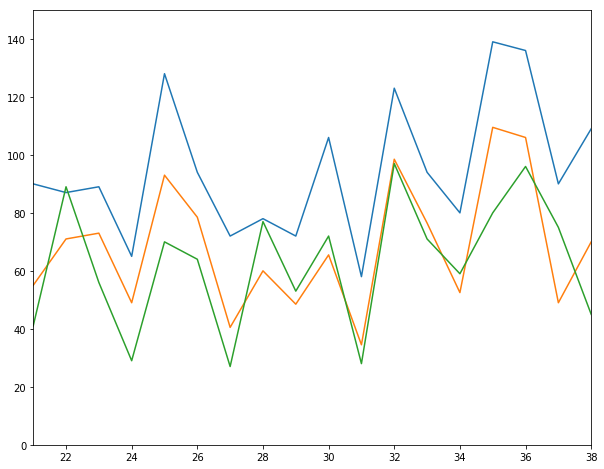

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(top_df_test.groupby('event')['round_points'].max())
plt.plot(top_df_test.groupby('event')['round_points'].median())
plt.plot(lr_points)
plt.plot()
plt.xlim(21, 38)
plt.ylim(0, 150)
plt.show()

In [56]:
standings_df['total_points_evaluation'] = standings_df['total_points']*0.479935

In [87]:
top_test_ranking['total_points_evaluation'] = top_test_ranking['round_points']

all_standings_df = \
pd.concat([
    standings_df[['rank', 'total_points_evaluation']],
    top_test_ranking[['rank', 'total_points_evaluation']].head(10) 
]).groupby('rank')[['total_points_evaluation']].max().reset_index().sort_values('rank')

all_standings_df.head(20)

,rank,total_points_evaluation
0,1,1327.000000
1,2,1321.000000
2,3,1300.000000
3,4,1297.000000
4,5,1288.000000
5,6,1280.000000
6,7,1278.000000
7,8,1270.000000
8,9,1265.000000
9,10,1258.000000


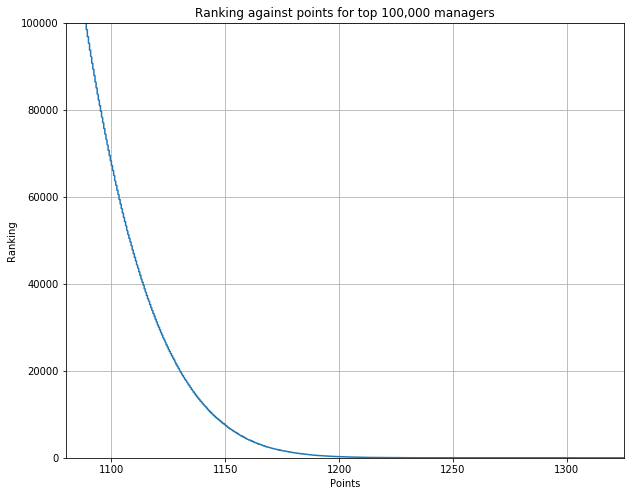

In [95]:
plt.figure(figsize=(10, 8))
plt.plot(
    all_standings_df['total_points_evaluation'],
    all_standings_df['rank']
)
plt.grid()
plt.ylim(1, 100000)
plt.xlim(1080, 1325)
plt.ylabel('Ranking')
plt.xlabel('Points')
plt.title('Ranking against points for top 100,000 managers')
plt.show()

In [104]:
all_standings_df[all_standings_df['rank'] < 62000][['rank', 'total_points_evaluation']].sort_values('rank').tail(100)

,rank,total_points_evaluation
1215,56573,1104.810370
1216,56628,1104.810370
1217,56673,1104.810370
1218,56721,1104.810370
1219,56780,1104.810370
1220,56913,1104.810370
1221,57083,1104.810370
1222,57128,1104.810370
1223,57218,1104.810370
1224,57243,1104.810370


In [126]:
all_standings_df[all_standings_df['total_points_evaluation'] >= 703][['rank', 'total_points_evaluation']].tail(20)

,rank,total_points_evaluation
32608,5511225,704.064645
32609,5511322,704.064645
32610,5511369,703.584710
32611,5512429,703.584710
32612,5512670,703.584710
32613,5512917,703.584710
32614,5513009,703.584710
32615,5513229,703.584710
32616,5513331,703.584710
32617,5513335,703.584710


In [127]:
all_standings_df['rank'].tail(20)

35920    6295605
35921    6295623
35922    6295694
35923    6295738
35924    6295790
35925    6295962
35926    6296011
35927    6296140
35928    6296250
35929    6296297
35930    6296350
35931    6296433
35932    6296489
35933    6296518
35934    6296553
35935    6296557
35936    6296568
35937    6296627
35938    6296636
35939    6296648
Name: rank, dtype: int64

In [114]:
310000.0/6200000*100

5.0

In [45]:
# average budget of top 50 managers

top_df_test.groupby('entry')['value'].mean().mean()

1057.7522222222224

In [46]:
top_df_test[top_df_test['event'] == 21]['value'].describe()

count      50.000000
mean     1049.500000
std        10.715714
min      1023.000000
25%      1044.000000
50%      1048.000000
75%      1057.000000
max      1073.000000
Name: value, dtype: float64

In [47]:
top_df_test[top_df_test['event'] == 38]['value'].describe()

count      50.000000
mean     1056.360000
std        12.443767
min      1018.000000
25%      1048.000000
50%      1056.500000
75%      1063.000000
max      1091.000000
Name: value, dtype: float64

In [48]:
top_df_test['value'].describe()

count     900.000000
mean     1057.752222
std        13.795977
min      1013.000000
25%      1048.000000
50%      1058.000000
75%      1067.000000
max      1098.000000
Name: value, dtype: float64